<center>

# Immigration to Canada: Trends and Analysis

</center>

# Downloading and Prepping Data <a id="2"></a>

The first thing we'll do is install **openpyxl** (formerly **xlrd**), a module that *pandas* requires to read Excel files and **plotly** Python library for creating interactive visualizations.

In [615]:
!pip install openpyxl==3.0.9

In [648]:
!pip install plotly

Import Primary Modules:

In [621]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file

Download the Canadian Immigration dataset and read it into a *Pandas* DataFrame. This can be done either by using a URL as shown below or by downloading it to an external device.

In [624]:
import requests
from io import BytesIO


# URL to the Excel (XLS) file
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'

# Send an HTTP GET request to the URL
response = requests.get(URL)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Get the content of the response as bytes
    content = response.content

    # Use BytesIO to create a bytes-like object from the content
    xls_file = BytesIO(content)

    # Read the Excel file into a DataFrame, skipping the first two rows and last three rows
    df_can = pd.read_excel(xls_file, sheet_name='Canada by Citizenship',skiprows=range(20), skipfooter=2)

    print('Data downloaded and read into a dataframe!')
else:
    print('Failed to retrieve data from the URL.')


Data downloaded and read into a dataframe!


Let's take a look at the items in our dataset.

In [625]:
df_can

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59


When conducting a dataset analysis, it is advisable to initiate the process by obtaining fundamental information about your DataFrame. This can be achieved using the `info()` method, which provides a concise summary of the dataset.

In [626]:
df_can.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 43 entries, Type to 2013
dtypes: int64(37), object(6)
memory usage: 65.6+ KB


In [627]:
#df_can.info()

To obtain the list of column headers, you can access the DataFrame's `columns` attribute. Similarly, to retrieve the list of indices, you can utilize the `.index` instance variable. It's important to note that the default types for the `index` and `columns` variables are **not** lists. If you wish to convert them to lists, you can use the `tolist()` method.

In [628]:
df_can.columns
df_can.index
print(type(df_can.columns))
print(type(df_can.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>


In [629]:
df_can.index.tolist()
df_can.columns.tolist()
print(type(df_can.columns.tolist()))
print(type(df_can.index.tolist()))

<class 'list'>
<class 'list'>


To streamline the dataset, let's eliminate some unnecessary columns. This can be accomplished using the `drop()` method from the *Pandas* library, as illustrated below. To enhance clarity, let's also rename the columns using the `rename()` method. This involves passing a dictionary containing the old and new column names. Additionally, we have shortened the longer country names with abbreviations using the `replace()` method.

In [630]:
df_can.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'}, inplace=True)
df_can.drop(['Type','Coverage','AREA','REG','DEV'], axis=1, inplace=True)
df_can['Country'] = df_can['Country'].replace({"United Kingdom of Great Britain and Northern Ireland": 'UK & Northern Ireland'})
#df_can = df_can.rename(index={"China, People's Republic of": 'China'})
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

We will additionally introduce a 'Total_by_country' column that calculates the total number of immigrants for each country over the entire period from 1980 to 2013.

In [631]:
# Create a new column 'Total_by_country' which sums the values across columns from 1980 to 2016
df_can['Total_by_country'] = df_can.loc[:, 1980:2013].sum(axis=1)

# Display the DataFrame with the new column
df_can

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total_by_country
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
192,Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,...,161,140,122,133,128,211,160,174,217,2985
193,Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,...,91,77,71,64,60,102,69,46,59,1677


We can check for null values in the dataset using the following approach. 

**Note** that if we encounter missing values, we may consider using methods like `dropna()` to remove rows with missing values or `fillna()` to fill in missing values with specific values or strategies.

In [632]:
df_can.isnull().sum()

Country             0
Continent           0
Region              0
DevName             0
1980                0
1981                0
1982                0
1983                0
1984                0
1985                0
1986                0
1987                0
1988                0
1989                0
1990                0
1991                0
1992                0
1993                0
1994                0
1995                0
1996                0
1997                0
1998                0
1999                0
2000                0
2001                0
2002                0
2003                0
2004                0
2005                0
2006                0
2007                0
2008                0
2009                0
2010                0
2011                0
2012                0
2013                0
Total_by_country    0
dtype: int64

Finally, let's generate a quick summary of each column in our dataframe using the `describe()` method. This is useful for gaining a rapid understanding of the distribution and characteristics of our data, identifying potential outliers, and gaining insights into the variability of each numerical feature in the DataFrame.

In [633]:
df_can.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total_by_country
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


Let's count the unique country names in the 'Country' column of the DataFrame to check for repetitions.

In [634]:
# Find the number of unique entries in the 'Country' column
unique_count = df_can['Country'].nunique()

print("Number of unique entries in the 'Country of Citizenship' column:", unique_count)

Number of unique entries in the 'Country of Citizenship' column: 195


The `df_can.shape` attribute is used to get the dimensions of the DataFrame.

In [635]:
print("Shape of the dataframe df_can:", df_can.shape)

Shape of the dataframe df_can: (195, 39)


Import the required additional modules, and note that `%matplotlib inline` is a configuration setting for Jupyter notebooks, ensuring that `Matplotlib` plots are displayed directly in the notebook. 

In [636]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

The line `mpl.style.use(['ggplot'])` in Matplotlib applies the 'ggplot' style, inspired by the 'ggplot2' package in R. This style is recognized for creating clean and visually appealing plots.

In [637]:
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Generate a line plot illustrating the trends in immigration for each country over the specified years (1980 to 2013).

C:\Users\subag\AppData\Local\Temp\ipykernel_15208\1320581340.py:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



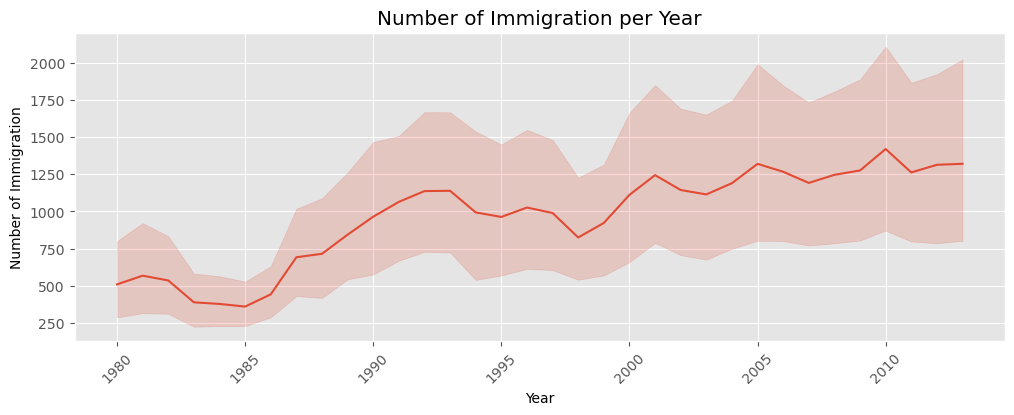

In [638]:
df_year = df_can[['Country'] + list(range(1980, 2014))].copy()
df_Total = pd.melt(df_year, id_vars=['Country'], var_name='Year', value_name='Number of Immigration')

plt.figure(figsize=(12, 4))

lineplot = sns.lineplot(x = 'Year', y = 'Number of Immigration', data = df_Total)

lineplot.set_xticklabels(lineplot.get_xticklabels(), rotation=45)

plt.title('Number of Immigration per Year')
plt.show()

We can observe the total number of immigrants for each country.

In [639]:
df_Total.head()

,Country,Year,Number of Immigration
0,Afghanistan,1980,16
1,Albania,1980,1
2,Algeria,1980,80
3,American Samoa,1980,0
4,Andorra,1980,0


Let's sort the DataFrame by the 'Total_by_country' column in descending order and then reset the index to reflect the new order of rows. The use of `inplace=True` ensures that these operations are directly applied to the original DataFrame without the need for reassignment.

In [640]:
inplace = True # paramemter saves the changes to the original df_can dataframe
df_can.sort_values(by='Total_by_country', ascending=False, axis=0, inplace=True)
df_can.reset_index(drop=True, inplace=True)
#df_can.set_index('Country', inplace=True)

In [641]:
df_can

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total_by_country
0,India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
1,China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
2,UK & Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
3,Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
4,Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,5
191,New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,5
192,Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,2
193,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2


This code creates an interactive line plot using `Plotly Express` to visualize the total number of immigrants per year across all countries.

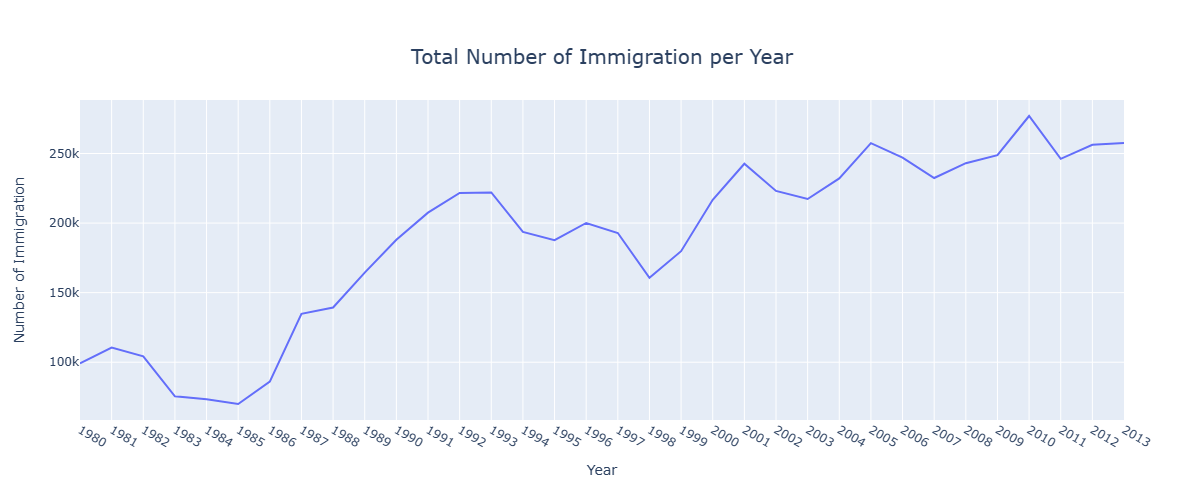

In [642]:
import plotly.express as px

df_year = df_can[['Country'] + list(range(1980, 2014))].copy()
df_Total = pd.melt(df_year, id_vars=['Country'], var_name='Year', value_name='Number of Immigration')

# Aggregate data by summing the immigration numbers for each year
df_agg = df_Total.groupby(['Year']).agg({'Number of Immigration': 'sum'}).reset_index()


# Create an interactive line plot
fig = px.line(df_agg, x='Year', y='Number of Immigration',
              labels={'Number of Immigration': 'Number of Immigration'},
              title='Total Number of Immigration per Year')

# Customize the layout
fig.update_layout(xaxis=dict(type='category'), width=1000, height=500)
fig.update_xaxes(dtick='M1', tickformat='%Y', ticklabelmode='period')
fig.update_layout(title_text='Total Number of Immigration per Year', title=dict(font=dict(size=20), x=0.5, y=0.9))

fig.show()

Let's create a plot that enables users to interactively explore the overall immigration trend across the years. Users can also view the immigration data for individual countries in the selected year using a dropdown menu, providing different perspectives on the data.

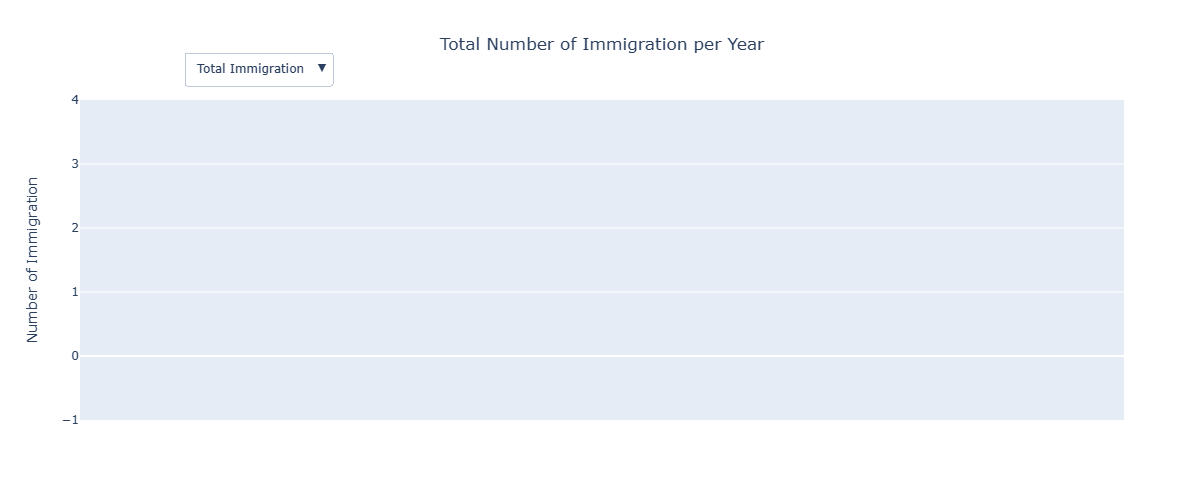

In [643]:
import plotly.graph_objects as go


#df_year = df_can[['Country'] + list(range(1980, 2016))].copy()
#df_Total = pd.melt(df_year, id_vars=['Country'], var_name='Year', value_name='Number of Immigration')

# Aggregate data by summing the immigration numbers for each year
#df_agg = df_Total.groupby(['Year']).agg({'Number of Immigration': 'sum'}).reset_index()

# Create the initial layout
layout = go.Layout(title='Total Number of Immigration per Year',
                   title_x=0.5,  # Set title_x to position the title in the middle
                   xaxis=dict(type='category'),
                   yaxis=dict(title='Number of Immigration'),
                   width=1000,
                   height=500)

# Create an empty trace
empty_trace = go.Scatter(x=[], y=[], mode='lines+markers')

# Add the dropdown menu
dropdown_options = [{'label': 'Total Immigration',
                     'method': 'update',
                     'args': [{'x': [df_agg['Year']],
                               'y': [df_agg['Number of Immigration']],
                               'mode': 'lines+markers'}]}]

for year in df_Total['Year'].unique():
    dropdown_options.append({'label': f'Year {year}',
                             'method': 'update',
                             'args': [{'x': [df_Total[df_Total['Year'] == year]['Country']],
                                       'y': [df_Total[df_Total['Year'] == year]['Number of Immigration']],
                                       'mode': 'lines+markers'}]})

layout.updatemenus = [dict(type='dropdown', x=0.1, xanchor='left', y=1.15, yanchor='top', buttons=dropdown_options)]

# Create the figure
fig = go.Figure(data=[empty_trace], layout=layout)

# Show the interactive plot
fig.show()

In [644]:
df_can[['Country', 'Total_by_country']]

,Country,Total_by_country
0,India,691904
1,China,659962
2,UK & Northern Ireland,551500
3,Philippines,511391
4,Pakistan,241600
...,...,...
190,San Marino,5
191,New Caledonia,5
192,Marshall Islands,2
193,Western Sahara,2


This code facilitates an interactive visualization of the top 'X' countries with the highest total immigration. The visualization is presented through an interactive bar graph created using Plotly. Users have the flexibility to input various values for 'X,' determining the number of countries displayed in the graph. Additionally, users can opt to continue exploring the data by entering 'yes' when prompted.

Enter the number of countries (X):  10


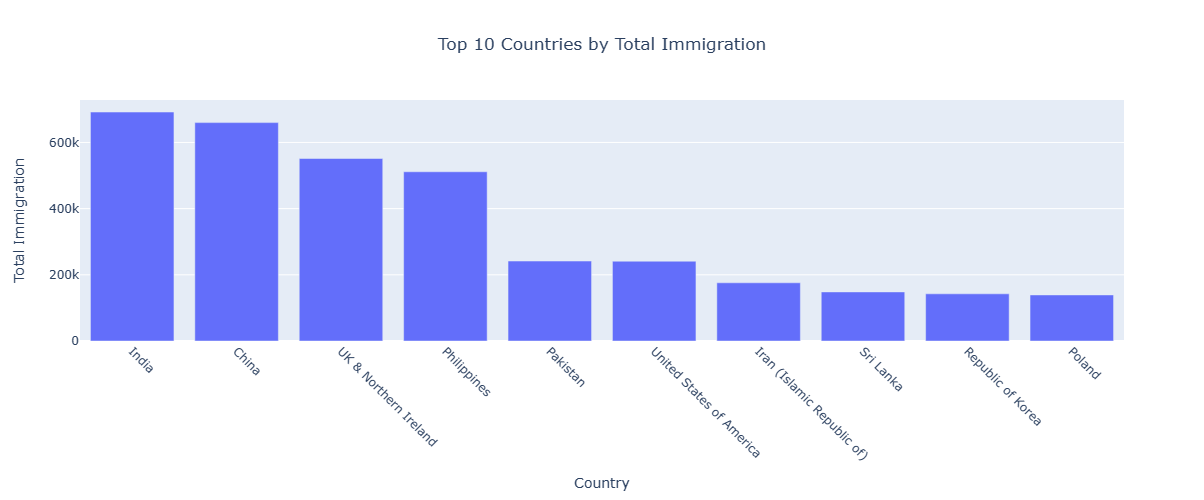

Do you want to enter another value? (yes/no):  no


In [645]:
def plot_top_countries(X):
    # Extract the first X entries
    top_X_countries = df_can.head(X)

    # Create an interactive bar graph using plotly
    fig = px.bar(top_X_countries, x='Country', y='Total_by_country',
                 labels={'Total_by_country': 'Total Immigration'},
                 title=f'Top {X} Countries by Total Immigration')

    # Customize the layout
    fig.update_layout(xaxis_title='Country', yaxis_title='Total Immigration', width=1000, height=500)
    fig.update_xaxes(tickangle=45, tickmode='array', tickvals=top_X_countries.index, ticktext=top_X_countries['Country'])
    fig.update_layout(title_x=0.5)
    # Show the interactive plot
    fig.show()

# Specify the number of entries to extract
while True:
    X = int(input("Enter the number of countries (X): "))
    if X < 1:
        print("Invalid input. Please enter a positive integer.")
    else:
        plot_top_countries(X)
    # Ask if the user wants to continue
    continue_input = input("Do you want to enter another value? (yes/no): ").lower()
    if continue_input != 'yes':
        break

This code ensures that all column names in the DataFrame are of string data type, which can be useful for consistency and compatibility in various operations or analyses.

In [341]:
df_can.columns = list(map(str, df_can.columns))
#[print (type(x)) for x in df_can.columns.values]

Now, we generate a list of strings that represent the years from 1980 to 2013 (inclusive) using the `range` function in combination with the `map` function.

In [342]:
years = list(map(str, range(1980, 2014)))

This code alters the DataFrame structure of `df_can` by assigning the 'Country' column as the index, thus transforming 'Country' into the new row labels for the DataFrame.

In [343]:
df_can.set_index('Country', inplace=True)

In [344]:
#df_can = df_can.reset_index()

We plot a line graph of immigration from Sri Lanka using `px.line()`.

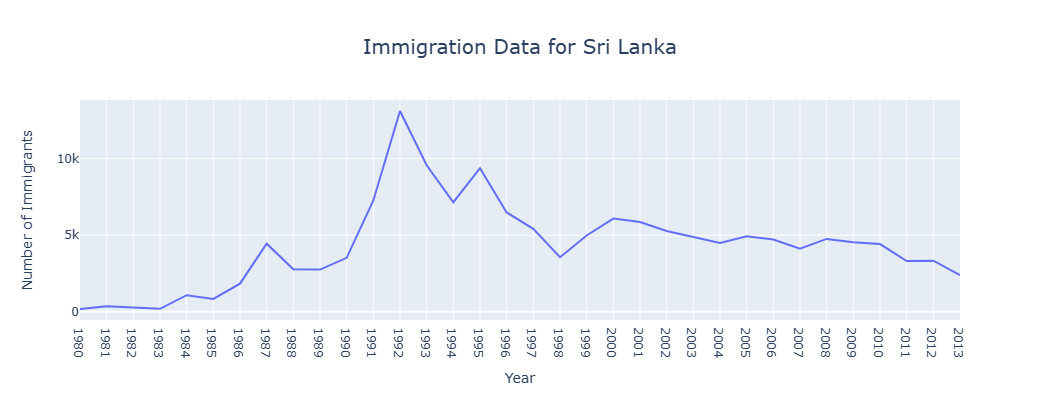

In [346]:
Sri_Lanka = df_can.loc['Sri Lanka', years]
# Convert the extracted data to a DataFrame
sri_lanka_df = pd.DataFrame({'Year': Sri_Lanka.index, 'Number of Immigrants': Sri_Lanka.values})

# Create an interactive line plot for Sri Lanka
fig = px.line(sri_lanka_df, x='Year', y='Number of Immigrants', labels={'Number of Immigrants': 'Number of Immigrants'}, title='Immigration Data for Sri Lanka')

# Customize the layout
fig.update_layout(xaxis=dict(type='category'), width=800, height=400)
fig.update_layout(title_text='Immigration Data for Sri Lanka', title=dict(font=dict(size=20), x=0.5, y=0.9))

# Show the interactive plot
fig.show()

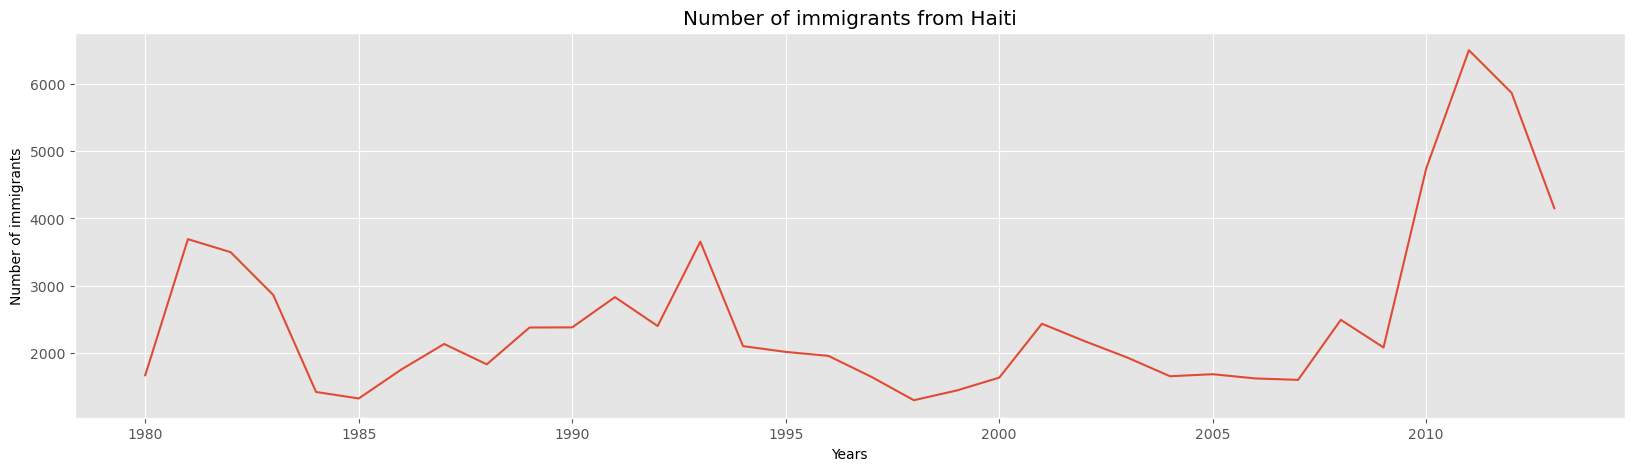

In [347]:
haiti = df_can.loc['Haiti', years] 
haiti.index = haiti.index.map(int)
plt.figure(figsize=(20, 5)) 
haiti.plot(kind='line')

plt.title('Number of immigrants from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')


plt.show()

Let's compare the number of immigrants from Sri Lanka, India and China from 1980 to 2013.

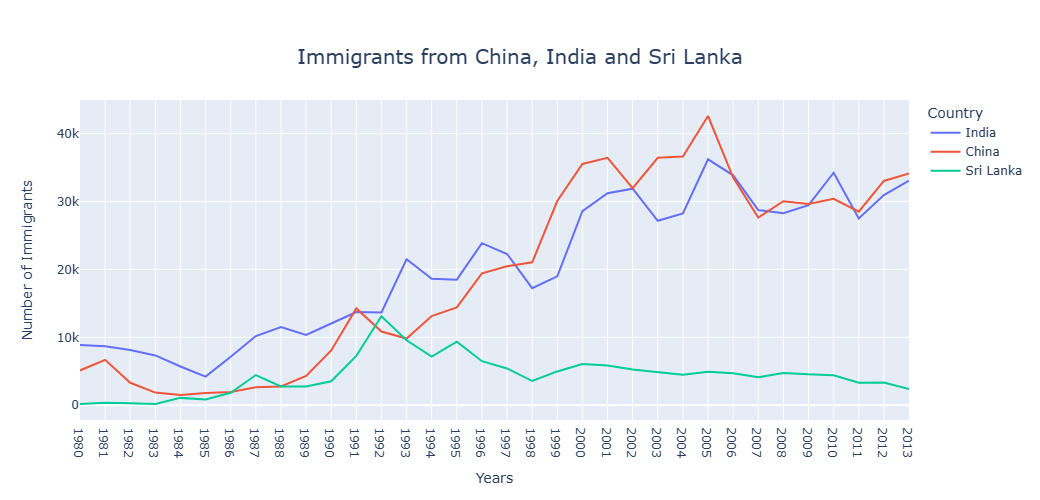

In [348]:
df_China_India_SL = df_can.loc[['India', 'China', 'Sri Lanka'], years].transpose()

# Create an interactive line plot using Plotly Express
fig = px.line(df_China_India_SL, title='Immigrants from China, India and Sri Lanka',
              labels={'value': 'Number of Immigrants', 'index': 'Years'},
              line_shape='linear')

# Customize the layout
fig.update_layout(xaxis_title='Years', yaxis_title='Number of Immigrants', width=1000, height=500)
fig.update_layout(title_text='Immigrants from China, India and Sri Lanka', title=dict(font=dict(size=20), x=0.5, y=0.9))

# Show the interactive plot
fig.show()

This function visualizes the immigration trends over the years for the top 5 countries in the `df_can` DataFrame, offering a graphical representation of the fluctuations in immigration numbers for these nations.

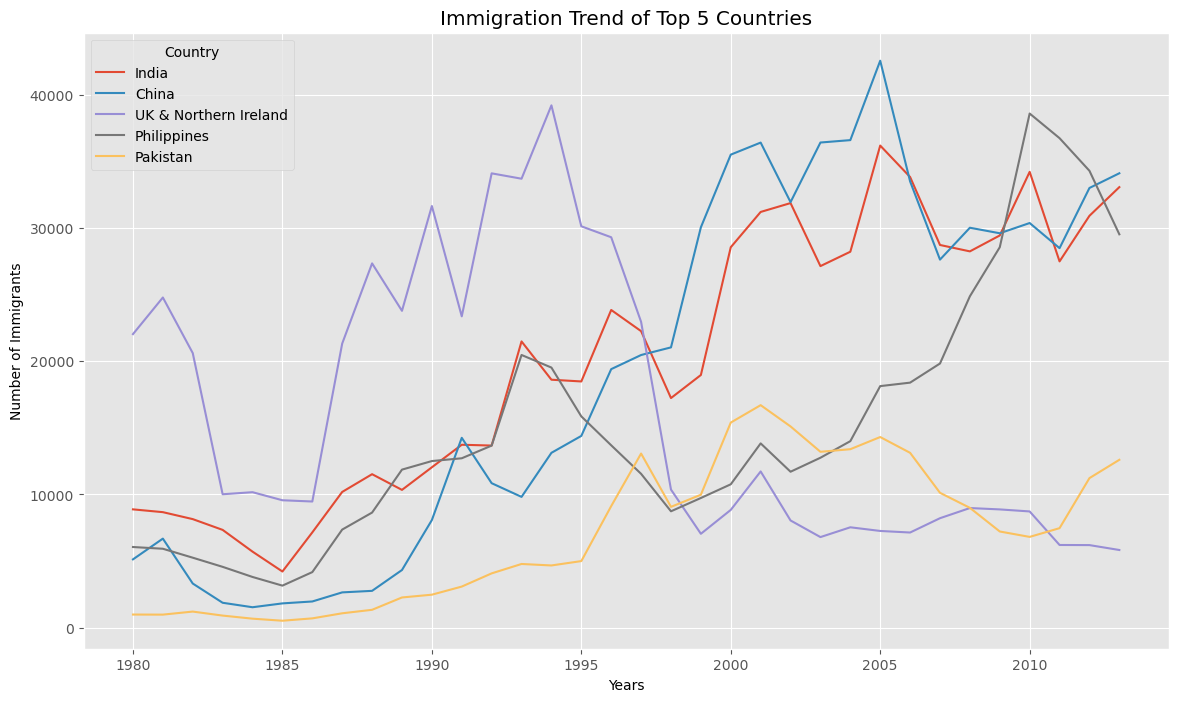

In [349]:
df_top5 = df_can.head(5)
df_top5 = df_top5[years].transpose() 
#df_top5
df_top5.index = df_top5.index.map(int) 
df_top5.plot(kind='line', figsize=(14, 8))



plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')


plt.show()

**Folium** is a Python library that makes it easy to visualize data that's been manipulated in Python on an interactive leaflet map. It's commonly used for creating interactive maps with various overlays and markers. **Folium** is not available by default. So, we first need to install it before we are able to import it. 

In [649]:
!pip install folium

In [352]:
import folium

print('Folium installed and imported!')

Folium installed and imported!


Create a Folium Map object and display it. The appeal of Folium maps lies in their interactivity, allowing you to zoom into any region of interest, regardless of the initial zoom level.

In [646]:
# define the world map
world_map = folium.Map()

# display world map
world_map

Install the **requests** library to simplify working with web APIs and facilitate interaction with web services.

In [354]:
!pip install requests

Note: you may need to restart the kernel to use updated packages.


This code retrieves a GeoJSON file that represents world countries from an online source using the `requests` library. It then parses the JSON content into a Python dictionary and outputs a confirmation message.

In [355]:
import requests
import json

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json'
response = requests.get(URL)
world_geo = json.loads(response.content)

#num_features = len(world_geo['features'])

#print(f'Number of features in the GeoJSON file: {num_features}')

print('GeoJSON file loaded!')

GeoJSON file loaded!


In [357]:
df_can = df_can.reset_index()

Generate an interactive choropleth map using Folium to illustrate the total immigration to Canada from various countries. The map features color-coded countries, a legend for interpretation, and a layer control that enables users to toggle the visibility of the choropleth layer.

In [358]:
# Create a numpy array of length 6 and has linear spacing from the minimum total immigration to the maximum total immigration
threshold_scale = np.linspace(df_can['Total_by_country'].min(),
                              df_can['Total_by_country'].max(),
                              250, dtype=int)
threshold_scale = threshold_scale.tolist()  # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1  # make sure that the last value of the list is greater than the maximum immigration

# Initialize the map. let Folium determine the scale.
world_map = folium.Map(location=[0, 0], zoom_start=2)

# Add choropleth layer with hover information using custom HTML in folium.Popup
folium.Choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total_by_country'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Immigration to Canada',
    reset=True,
    highlight=True,
    name='choropleth',
    popup=folium.features.GeoJsonPopup(fields=['Country', 'Total_by_country'], labels=True, sticky=True),
).add_to(world_map)

#Layer control sign
folium.LayerControl().add_to(world_map)

# Save the map
world_map


In [359]:
#sdata = df_can[df_can['Country'] == 'Australia']
#sdata

Let's group the DataFrame `df_can` based on the 'Region' column, calculate the sum of the 'Total_by_country' column within each region, and save the result in a new DataFrame named `df_region`. To enhance clarity, we then rename the column 'Total_by_country' to 'Total_by_region'. The resulting DataFrame, `df_region`, showcases the total immigration aggregated by region.

In [363]:
df_region = df_can.groupby('Region')['Total_by_country'].sum().reset_index()
df_region = df_region.rename(columns={'Total_by_country': 'Total_by_region'})
# Display the DataFrame with total immigration grouped by region
df_region

,Region,Total_by_region
0,Australia and New Zealand,34215
1,Caribbean,308253
2,Central America,161653
3,Central Asia,15024
4,Eastern Africa,167389
5,Eastern Asia,841201
6,Eastern Europe,421223
7,Melanesia,20689
8,Micronesia,36
9,Middle Africa,48628


We can now visualize the overall immigration across regions using a horizontal bar plot. Initially, the DataFrame (`df_region`) is sorted in descending order based on the 'Total_by_region' column. Subsequently, a horizontal bar plot is generated using Seaborn, with each bar depicting the total immigration for a particular region. The plot is styled with the 'viridis' color palette, and the x-axis denotes the regions, while the y-axis represents the total immigration.

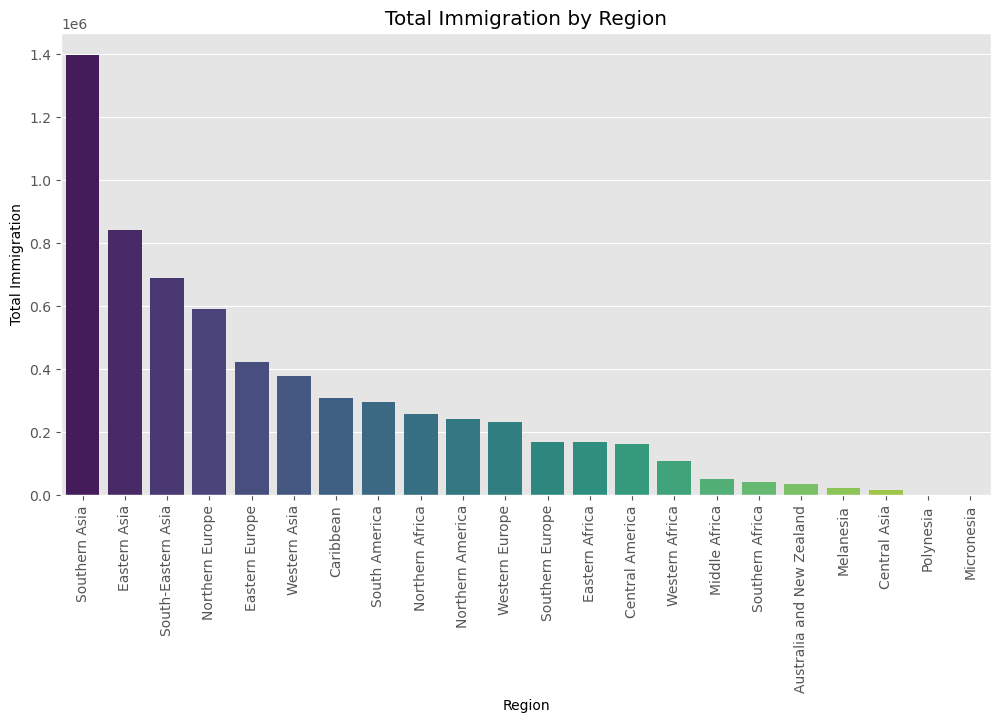

In [367]:
df_region.sort_values('Total_by_region', ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Total_by_region', data=df_region, palette='viridis')
plt.title('Total Immigration by Region')
plt.xlabel('Region')
plt.ylabel('Total Immigration')
plt.xticks(rotation='vertical')
plt.show()

We can create an exploding pie chart to visually illustrate the distribution of immigrants among developed or developing regions, categorized by 'DevName,' based on the total number of immigrants in each category. The exploding effect is implemented to emphasize a specific development category.

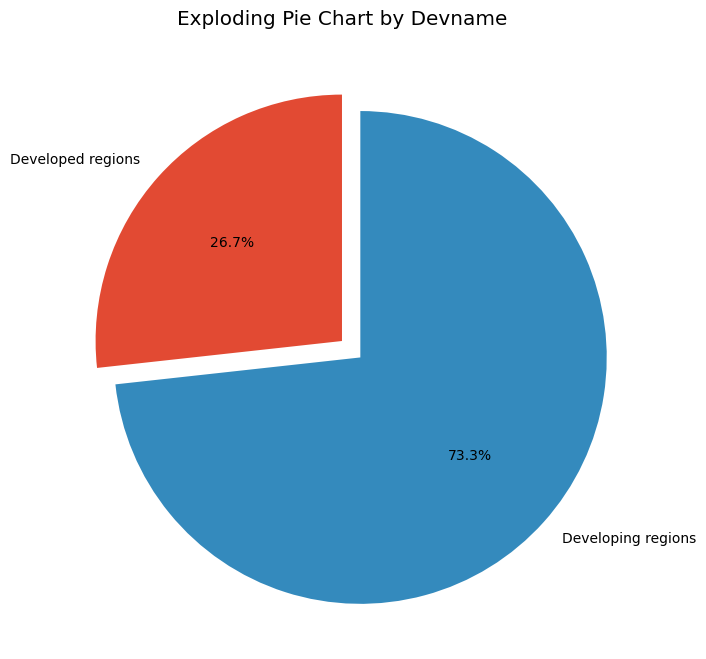

In [376]:
df_dev = df_can.groupby('DevName')['Total_by_country'].sum().reset_index()
df_dev = df_dev.rename(columns={'Total_by_country': 'Total_by_dev'})
colors = sns.color_palette() 
explode = (0, 0.1)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_dev['Total_by_dev'], labels=df_dev['DevName'], autopct='%1.1f%%', colors=colors, explode=explode, startangle=90)
plt.title('Exploding Pie Chart by Devname')
plt.show()
#df_dev

Code generates an exploding pie chart illustrating the distribution of total immigration numbers among continents in the 'df_can' DataFrame. 

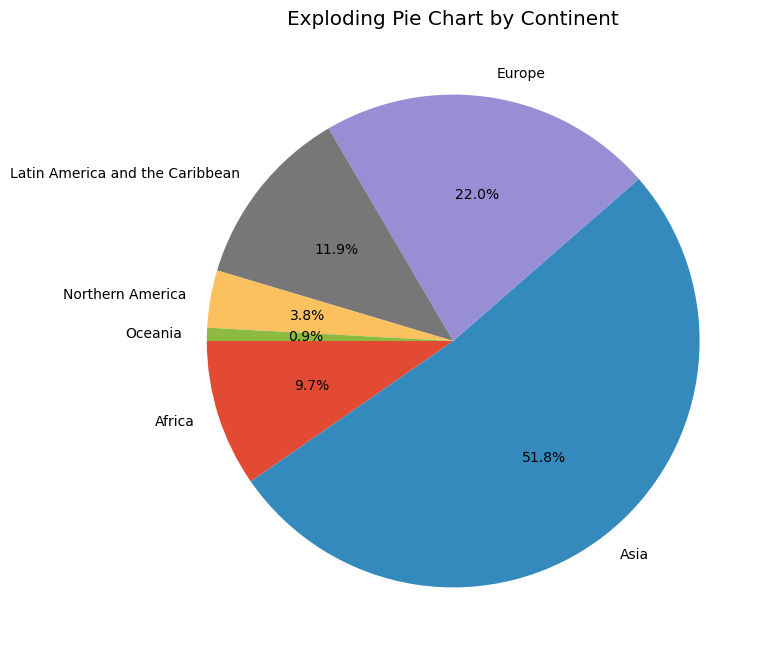

In [380]:
df_Continent = df_can.groupby('Continent')['Total_by_country'].sum().reset_index()
df_Continent = df_Continent.rename(columns={'Total_by_country': 'Total_by_Continent'})
colors = sns.color_palette() 
#explode = (0, 0.1)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_Continent['Total_by_Continent'], labels=df_Continent['Continent'], autopct='%1.1f%%', colors=colors, startangle=180)
plt.title('Exploding Pie Chart by Continent')
plt.show()

This code generates a Sunburst plot utilizing Plotly Express (`px.sunburst`) to illustrate immigration data to Canada from 1980 to 2013. The plot is constructed based on a designated hierarchical path ('DevName' -> 'Region' -> 'Continent'), presenting the cumulative immigration figures for each country.

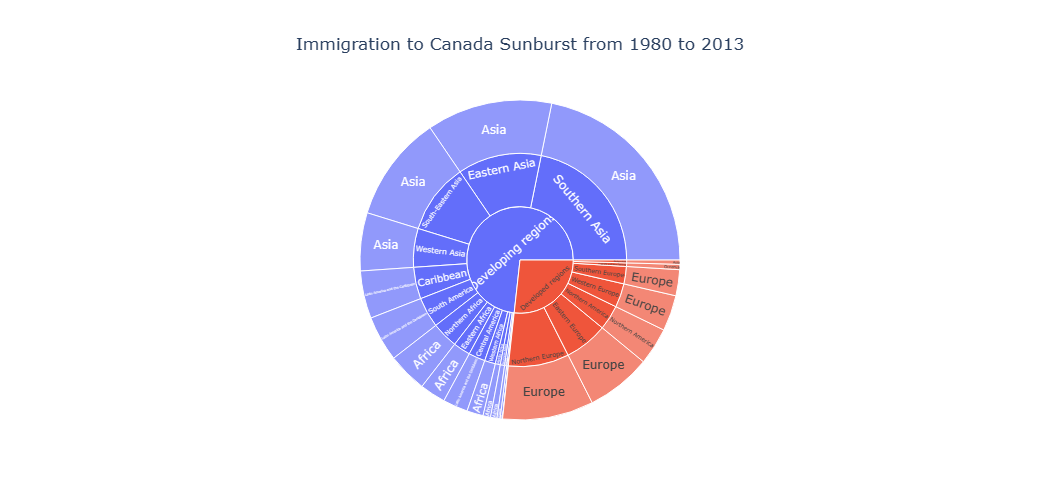

In [387]:
subbust_plot = px.sunburst(
    df_can, 
    path = ['DevName', 'Region', 'Continent'], 
    values = 'Total_by_country',
    title='Immigration to Canada Sunburst from 1980 to 2013'
    )
subbust_plot.update_layout(
    height=500,
    width=600,
    title=dict(
    x=0.5 
    )
)

subbust_plot.show()

Generate an interactive line plot using Plotly Express to depict the total immigration trends for each continent over the specified years. The plot is designed to facilitate exploration and interaction, and it has been customized for improved visualization.

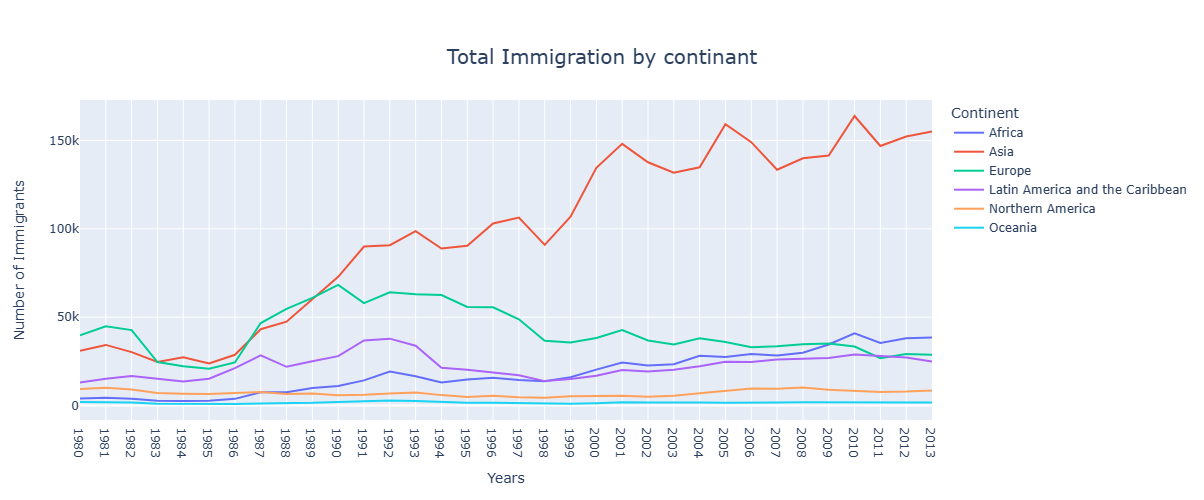

In [455]:
df_cont = df_can[['Continent'] + years].groupby('Continent').sum().transpose()

# Create an interactive line plot using Plotly Express
fig = px.line(df_cont, title='Total Immigration by continant',
              labels={'value': 'Number of Immigrants', 'index': 'Years'},
              line_shape='linear')

# Customize the layout
fig.update_layout(xaxis_title='Years', yaxis_title='Number of Immigrants', width=1000, height=500)
fig.update_layout(title_text='Total Immigration by continant', title=dict(font=dict(size=20), x=0.5, y=0.9))

# Show the interactive plot
fig.show()

Let's create a set of interactive scatter plots, one for each continent, illustrating the total number of immigrants over the specified years. These scatter plots offer insights into the immigration trends unique to each continent.

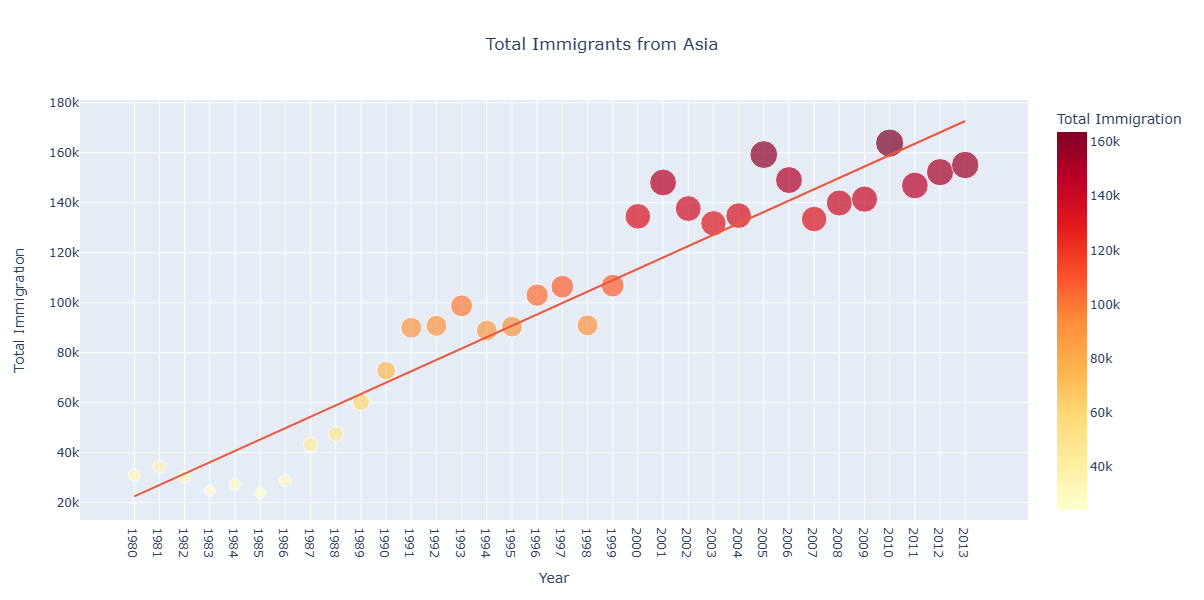

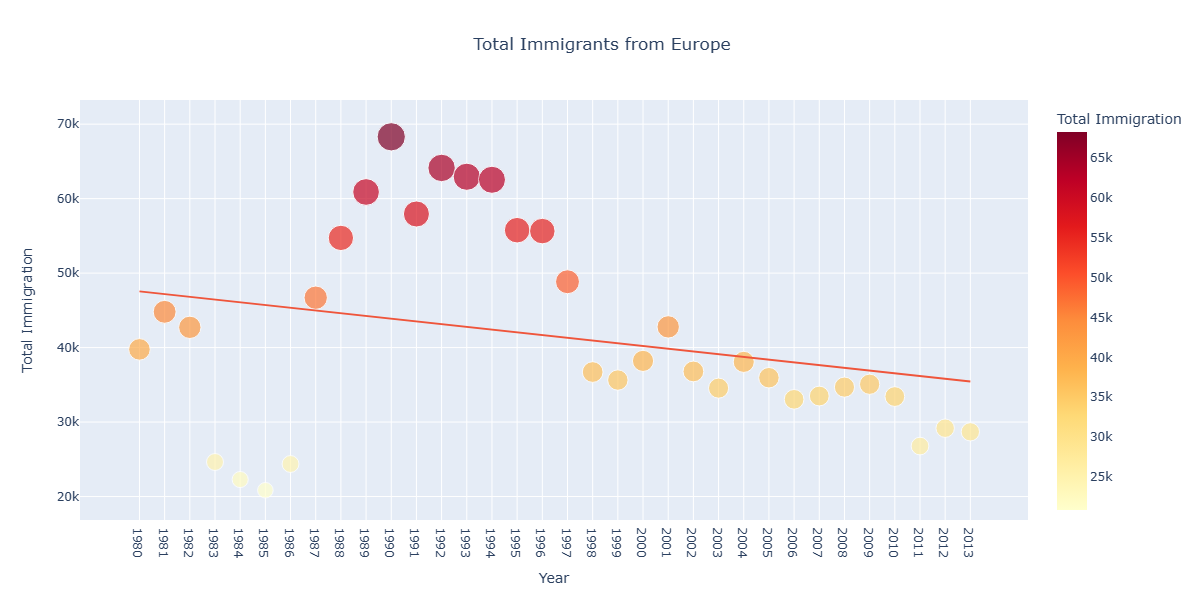

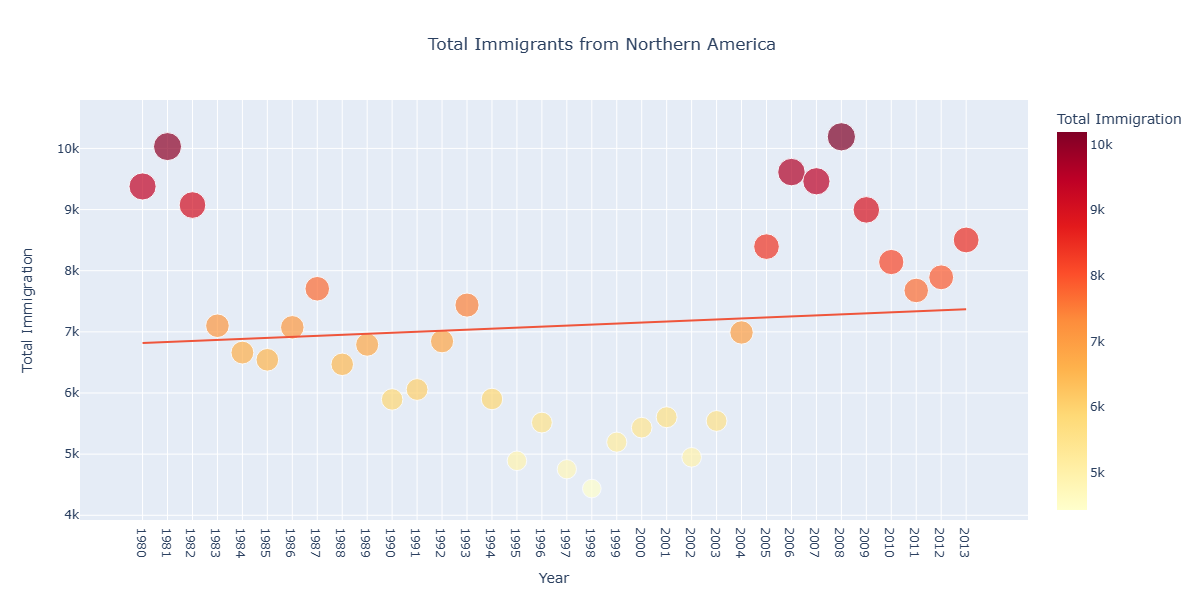

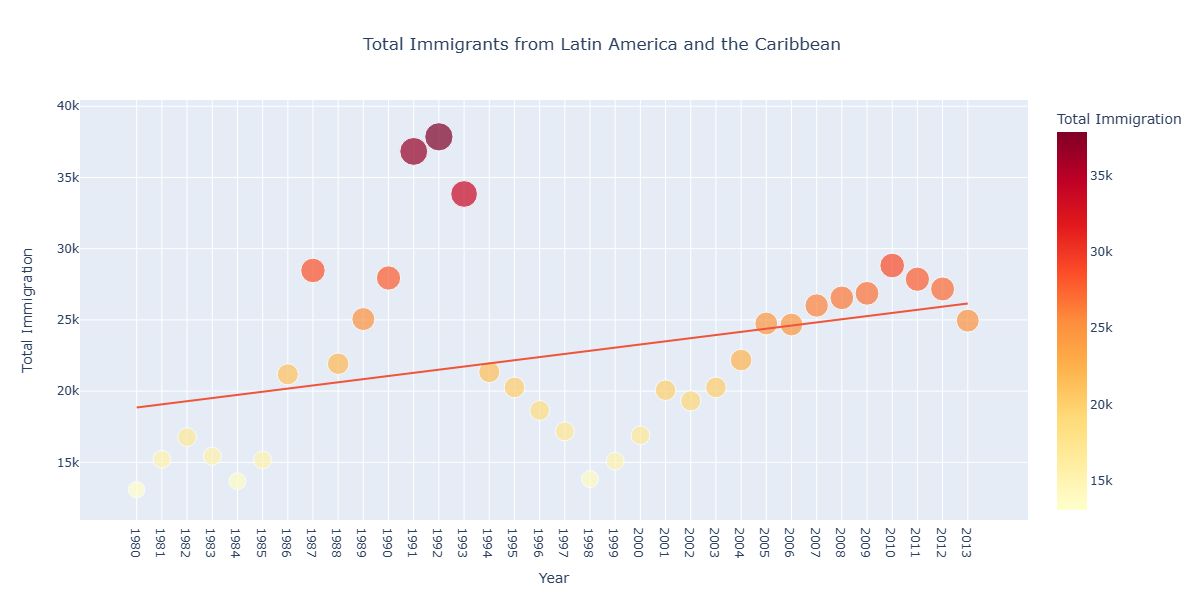

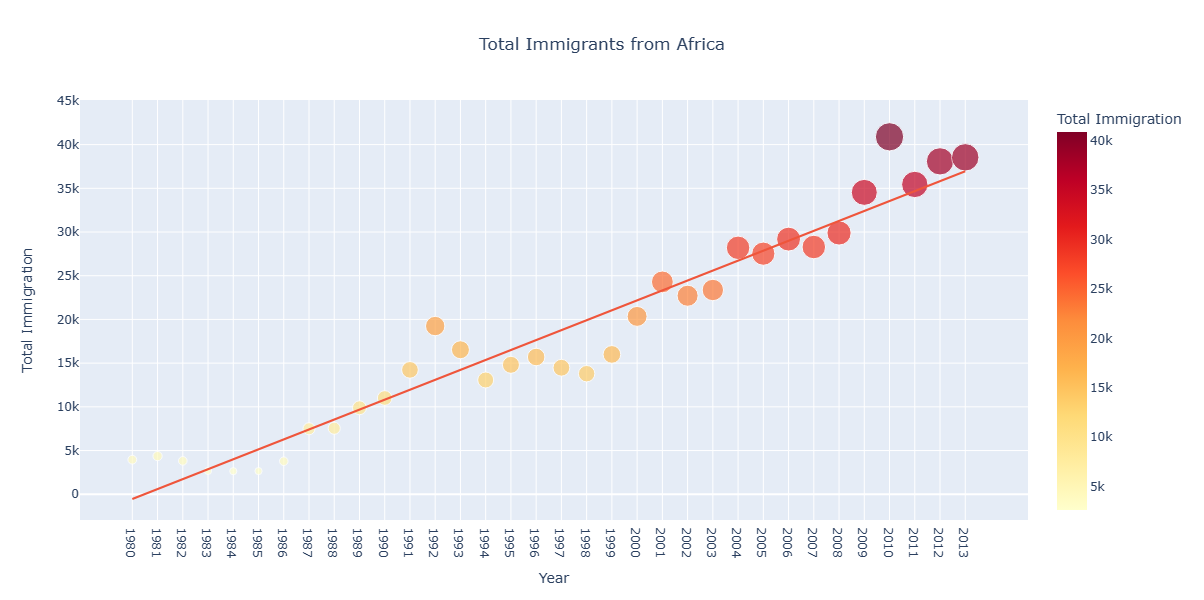

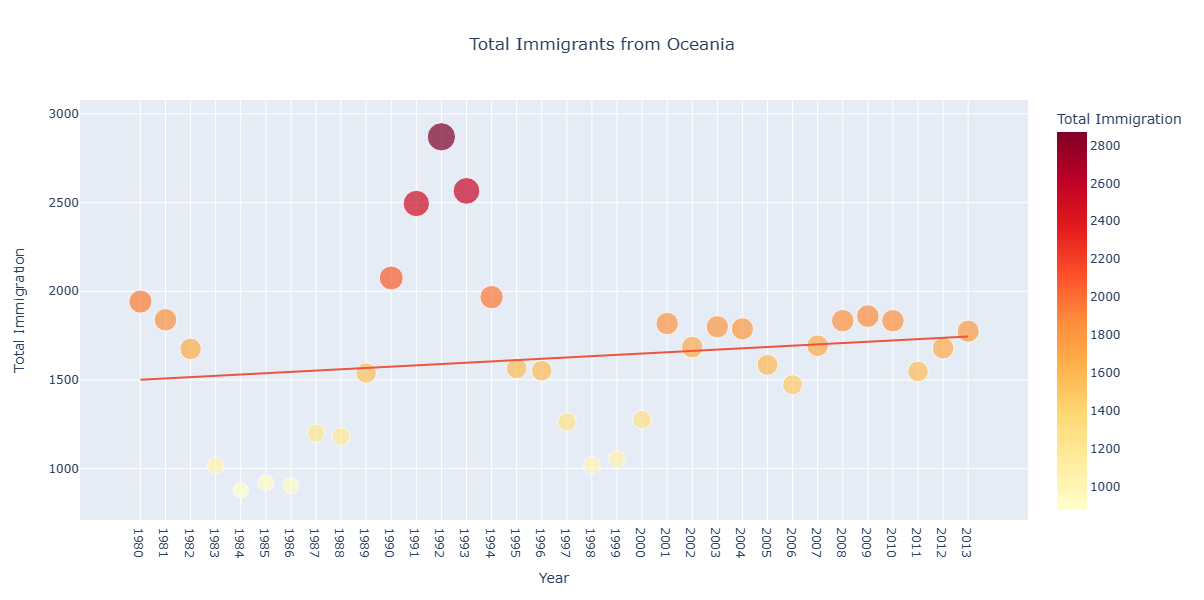

In [461]:
def plot_continent(continent):
    df_asia = df_can[df_can['Continent'] == continent][['Continent'] + years]
    # Melt the DataFrame to have years as a single column
    df_asia = df_asia.groupby('Continent')[years].sum().reset_index()

    df_asia = df_asia.melt(id_vars='Continent', var_name='Year', value_name='Number of Immigrants')
    # Create an interactive scatter plot
    scatter_plot = px.scatter(
        df_asia,
        x='Year',
        y='Number of Immigrants',
        color='Number of Immigrants',
        color_continuous_scale='YlOrRd',
        size='Number of Immigrants',
        title=f'Total Immigrants from {continent}',
        labels={'Number of Immigrants': 'Total Immigration'},
        hover_name='Continent',
        width=1000,
        height=600,
        trendline = 'ols'
    )
    scatter_plot.update_layout(title_x=0.5)
    # Show the interactive plot
    scatter_plot.show()
    
for continent in df_can['Continent'].unique():
    plot_continent(continent)


Let's extract immigration data for Sri Lanka, employs a Decision Tree Regressor & Random Forest Regressor to model the relationship between the year and the number of immigrants, and assesses the model's performance by calculating the mean absolute error.

In [611]:
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

#Sri_Lanka = df[years].sum()

Sri_Lanka = df_can.loc['Sri Lanka', years]
# Convert the extracted data to a DataFrame
sri_lanka_df = pd.DataFrame({'Year': Sri_Lanka.index, 'Number of Immigrants': Sri_Lanka.values})


# Extract the features (X) and the target variable (y)
X = sri_lanka_df[['Year']]
y = sri_lanka_df['Number of Immigrants']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

# Initialize and train the model
#model = LinearRegression()
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)


In [612]:
# Flatten the X_test array to a one-dimensional array
X_test_flat = X_test['Year'].values.ravel()

results_df = pd.DataFrame({'Year': X_test_flat, 'Actual': y_test, 'Predicted': predictions})
results_df = results_df.sort_values(by='Year')
# Display the DataFrame
results_df

,Year,Actual,Predicted
4,1984,1086,197.0
5,1985,845,1838.0
8,1988,2779,4447.0
10,1990,3525,2758.0
16,1996,6484,9368.0
19,1999,4982,3566.0
22,2002,5279,5861.0
24,2004,4495,4892.0
25,2005,4930,4714.0
29,2009,4547,4756.0


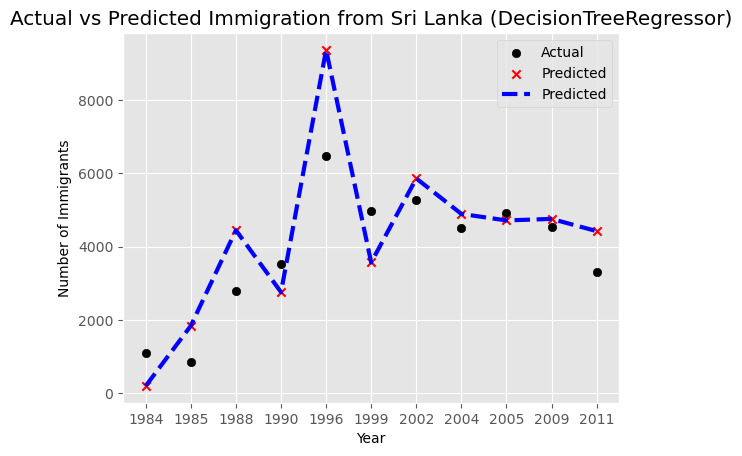

Mean Absolute Error: 1012.1818181818181


In [613]:
# Scatter plot for test values with labels
plt.scatter(results_df['Year'], results_df['Actual'], color='black', label='Actual', marker='o')
plt.scatter(results_df['Year'], results_df['Predicted'], color='red', label='Predicted', marker='x')

# Line plot for predictions
plt.plot(results_df['Year'], results_df['Predicted'], color='blue', linewidth=3, linestyle='dashed', label='Predicted')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Actual vs Predicted Immigration from Sri Lanka (DecisionTreeRegressor)')

# Legend
plt.legend()

# Show the plot
plt.show()

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

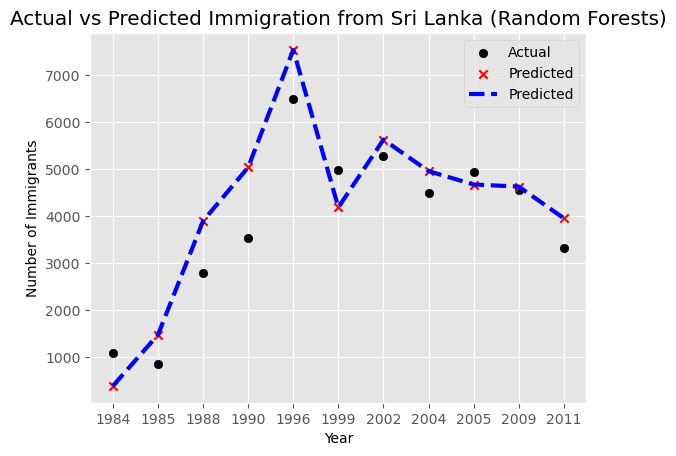

Mean Absolute Error (Random Forests): 689.3054545454544


In [614]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Flatten the X_test array to a one-dimensional array
X_test_flat = X_test['Year'].values.ravel()

results_df = pd.DataFrame({'Year': X_test_flat, 'Actual': y_test, 'Predicted': predictions})
results_df = results_df.sort_values(by='Year')

# Scatter plot for test values with labels
plt.scatter(results_df['Year'], results_df['Actual'], color='black', label='Actual', marker='o')
plt.scatter(results_df['Year'], results_df['Predicted'], color='red', label='Predicted', marker='x')

# Line plot for predictions
plt.plot(results_df['Year'], results_df['Predicted'], color='blue', linewidth=3, linestyle='dashed', label='Predicted')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Actual vs Predicted Immigration from Sri Lanka (Random Forests)')

# Legend
plt.legend()

# Show the plot
plt.show()

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (Random Forests): {mae}')
